In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv("KaggleV2-May-2016.csv")

In [15]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [17]:
df.shape

(110527, 14)

In [18]:
df.isnull().sum()


,0
PatientId,0
AppointmentID,0
Gender,0
ScheduledDay,0
AppointmentDay,0
Age,0
Neighbourhood,0
Scholarship,0
Hipertension,0
Diabetes,0


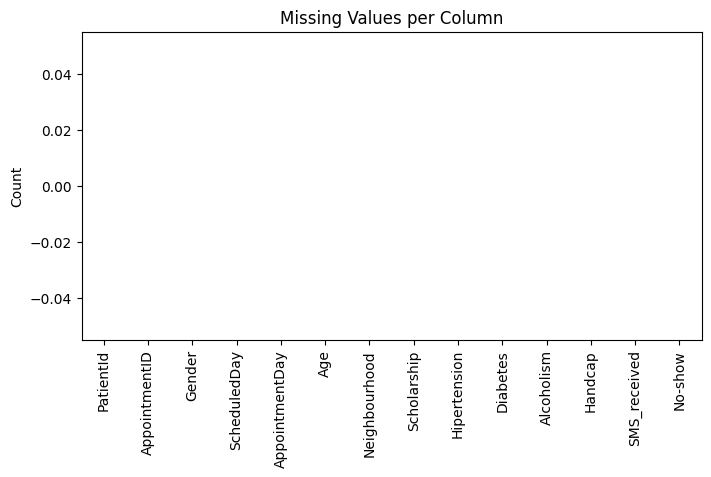

In [43]:
df.isnull().sum().plot(kind='bar', figsize=(8,4))
plt.title("Missing Values per Column")
plt.ylabel("Count")
plt.show()

In [21]:
df.duplicated().sum()

np.int64(0)

In [23]:
df.drop_duplicates(inplace=True)

In [25]:
df[df['Age'] < 0]


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [28]:
df = df[df['Age'] >= 0]


In [30]:
df['Age'].fillna(df['Age'].median(), inplace=True)

/tmp/ipython-input-1933487976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [32]:
df['Age'] = df['Age'].fillna(df['Age'].median())


In [33]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])


In [35]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [36]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [38]:
threshold = len(df) * 0.5
df.dropna(thresh=threshold, axis=1, inplace=True)


In [39]:
df.isnull().sum()


,0
PatientId,0
AppointmentID,0
Gender,0
ScheduledDay,0
AppointmentDay,0
Age,0
Neighbourhood,0
Scholarship,0
Hipertension,0
Diabetes,0


In [40]:
df.shape


(110526, 14)

In [41]:
print("Final dataset rows:", df.shape[0])
print("Final dataset columns:", df.shape[1])

Final dataset rows: 110526
Final dataset columns: 14


In [45]:
df.to_csv("cleaned_medical_appointments.csv", index=False)


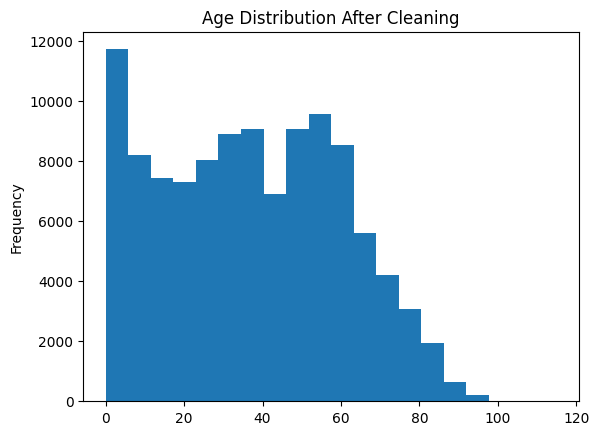

In [46]:
df['Age'].plot(kind='hist', bins=20)
plt.title("Age Distribution After Cleaning")
plt.show()
